In [12]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

pce_data = pf.get_series(series_id="PCE", api_key=api_key)
pce_data_not_adj = pf.get_series(series_id="PCE", api_key=api_key)

# Convert 'Date' column to datetime format
pce_data['date'] = pd.to_datetime(pce_data['date'])
# Sort DataFrame by 'Date' in ascending order
pce_data.sort_values('date', inplace=True)
# Calculate month-over-month percentage change
pce_data['MoM_Percentage_Change'] = pce_data['value'].pct_change() * 100
# Calculate year-over-year percentage change
pce_data_not_adj['YoY_Percentage_Change'] = pce_data_not_adj['value'].pct_change(12) * 100

# Merge YoY_Percentage_Change column from df2 to df1 based on 'Date'
pce_data = pd.merge(pce_data, pce_data_not_adj[['date', 'YoY_Percentage_Change']], on='date', how='left')

print(pce_data)

pce_info = pf.get_series_info(series_id="PCE", api_key=api_key)

    realtime_start realtime_end       date    value  MoM_Percentage_Change  \
0       2023-05-13   2023-05-13 1959-01-01    306.1                    NaN   
1       2023-05-13   2023-05-13 1959-02-01    309.6               1.143417   
2       2023-05-13   2023-05-13 1959-03-01    312.7               1.001292   
3       2023-05-13   2023-05-13 1959-04-01    312.2              -0.159898   
4       2023-05-13   2023-05-13 1959-05-01    316.1               1.249199   
..             ...          ...        ...      ...                    ...   
766     2023-05-13   2023-05-13 2022-11-01  17735.0              -0.242994   
767     2023-05-13   2023-05-13 2022-12-01  17736.5               0.008458   
768     2023-05-13   2023-05-13 2023-01-01  18085.8               1.969385   
769     2023-05-13   2023-05-13 2023-02-01  18096.0               0.056398   
770     2023-05-13   2023-05-13 2023-03-01  18104.2               0.045314   

     YoY_Percentage_Change  
0                      NaN  
1    

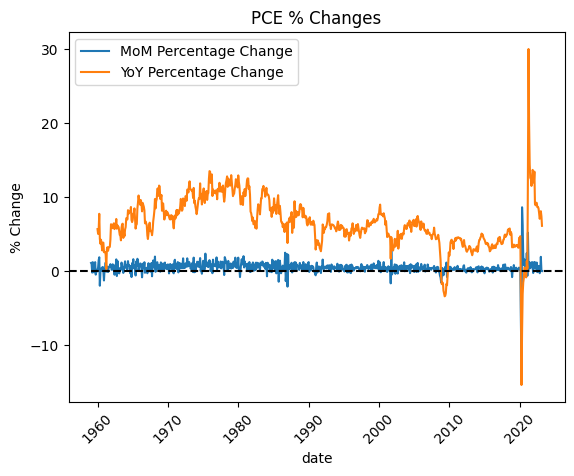

In [13]:
# Plot MoM_Percentage_Change and YoY_Percentage_Change
plt.plot(pce_data['date'], pce_data['MoM_Percentage_Change'], label='MoM Percentage Change')
plt.plot(pce_data['date'], pce_data['YoY_Percentage_Change'], label='YoY Percentage Change')

plt.xlabel('date')
plt.ylabel('% Change')
plt.title('PCE % Changes')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

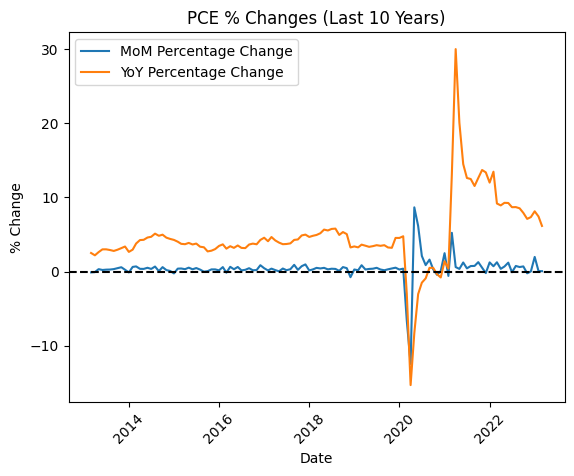

In [14]:
# Filter the DataFrame for the last 10 years
last_10_years_data = pce_data[pce_data['date'] >= pce_data['date'].max() - pd.DateOffset(years=10)]

# Plot MoM_Percentage_Change and YoY_Percentage_Change for the last 10 years
plt.plot(last_10_years_data['date'], last_10_years_data['MoM_Percentage_Change'], label='MoM Percentage Change')
plt.plot(last_10_years_data['date'], last_10_years_data['YoY_Percentage_Change'], label='YoY Percentage Change')

plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('PCE % Changes (Last 10 Years)')
plt.legend()
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [15]:
# Convert DataFrame to JSON
pce_json = pce_data.to_json(orient='records')

# Parse the JSON
data = json.loads(pce_json)

# Get the last item
last_item = data[-1]

print("MoM % Change: " + str(last_item['MoM_Percentage_Change']) + "% | Last Updated: " + str(pce_info.last_updated))
print("YoY % Change: " + str(last_item['YoY_Percentage_Change']) + "% | Last Updated: " + str(pce_info.last_updated))

MoM % Change: 0.0453138815% | Last Updated: 2023-04-28 07:43:05-05
YoY % Change: 6.15684113% | Last Updated: 2023-04-28 07:43:05-05


In [16]:
print("Info: " + str(pce_info.id))
print("Title: " + str(pce_info.title))
print("Frequency: " + str(pce_info.frequency))
print("Units: " + str(pce_info.units))
print("Last Updated: " + str(pce_info.last_updated))
print("Popularity: " + str(pce_info.popularity))
print("Notes: " + str(pce_info.notes))

Info: PCE
Title: Personal Consumption Expenditures
Frequency: Monthly
Units: Billions of Dollars
Last Updated: 2023-04-28 07:43:05-05
Popularity: 83
Notes: BEA Account Code: DPCERC
A Guide to the National Income and Product Accounts of the United States (http://www.bea.gov/national/pdf/nipaguid.pdf) (NIPA).
